In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('./src')
from geometry import *
from tubes import closed_geometry
from solver import stokes2d

In [2]:
p1 = np.array([-10,-1])
curve1 = line

p2 = np.array([-1,-1])
curve2 = line

p3 = np.array([-1,-10])
curve3 = cap

p4 = np.array([1,-10])
curve4 = line

p5 = np.array([1,-1])
curve5 = line

p6 = np.array([10,-1])
curve6 = cap

p7 = np.array([10,1])
curve7 = line

p8 = np.array([1,1])
curve8 = line

p9 = np.array([1,10])
curve9 = cap

p10 = np.array([-1,10])
curve10 = line

p11 = np.array([-1,1])
curve11 = line

p12 = np.array([-10,1])
curve12 = cap

In [3]:
pts = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12]
curves = [curve1, curve2, curve3, curve4, curve5, curve6, curve7, curve8, curve9, curve10, curve11, curve12]

In [4]:
cross = closed_geometry(pts,curves,corner_size=0.2)

In [5]:
cross.build_geometry(2e-2)

In [6]:
for i in cross.curves:
    print(type(i),i.a.shape)
print(cross.a.shape)

<class 'geometry.line'> (1024,)
<class 'geometry.corner'> (256,)
<class 'geometry.line'> (1024,)
<class 'geometry.cap'> (512,)
<class 'geometry.line'> (1024,)
<class 'geometry.corner'> (256,)
<class 'geometry.line'> (1024,)
<class 'geometry.cap'> (512,)
<class 'geometry.line'> (1024,)
<class 'geometry.corner'> (256,)
<class 'geometry.line'> (1024,)
<class 'geometry.cap'> (512,)
<class 'geometry.line'> (1024,)
<class 'geometry.corner'> (256,)
<class 'geometry.line'> (1024,)
<class 'geometry.cap'> (512,)
(11264,)


# solvers, pressure drops, velocity field

In [7]:
solver = stokes2d(cross,gmres_tol=1e-13)

In [8]:
inflow = cross.caps[0]
outflows = cross.caps[1:]
flows = [(inflow,outflow) for outflow in outflows]

In [9]:
def get_boundary_velocity_conditions(flow):
    velocity = []
    for i,c in enumerate(cross.curves):
        if i == flow[0]:
            velocity.append(c.get_velocity(flux=1))
        elif i == flow[1]:
            velocity.append(c.get_velocity(flux=-1))
        else:
            velocity.append(c.get_velocity(flux=0))
    return np.concatenate(velocity)

flows_boundary_conditions = [get_boundary_velocity_conditions(flow) for flow in flows]

heuristic, curvature, expansion, 

- see if legendre coefficients decayed. dx_da, dy_da, not higher order derivatives. 

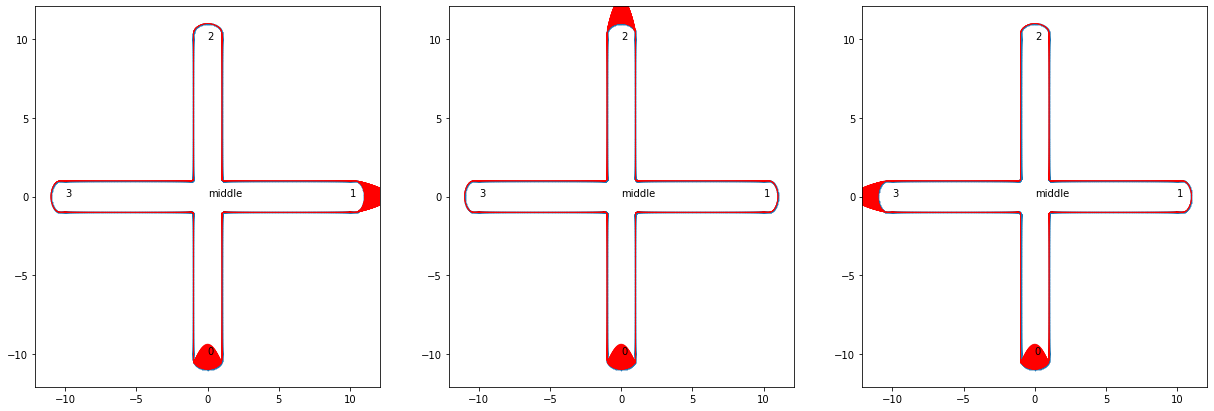

In [10]:
fig, axes = plt.subplots(1,3, figsize=(21,7))
for i in range(3):
    axes[i].scatter(cross.x,cross.y,s=0.1)
    axes[i].quiver(cross.x,cross.y,flows_boundary_conditions[i][:,0],flows_boundary_conditions[i][:,1],scale=10,color='r')
    for k,j in enumerate(cross.caps):
        axes[i].text(cross.curves[j].p[0],cross.curves[j].p[1],str(k))
    axes[i].text(0,0,'middle')
    

In [11]:
omegas = [solver.solve(flows_boundary_condition) for flows_boundary_condition in flows_boundary_conditions]

gmres starts solving the Nystorm, please wait...
gmres converged
gmres starts solving the Nystorm, please wait...
gmres converged
gmres starts solving the Nystorm, please wait...
gmres converged


In [12]:
solver.clean_A()

In [26]:
pressure_drops = []

for i,o in flows:
    start = cross.curves[i].p
    end = cross.curves[o].p
    
for i,flow in enumerate(flows):
    # computing the pressure drop with unit flux of the flow i. 
    omega = omegas[i]
    pressure_drop = []

    start_point = cross.curves[inflow].p
    start_point_z = start_point[0] + 1j*start_point[1]
    start_point_pressure = solver.compute_pressure(start_point_z,omega)
    
    for j,flow2 in enumerate(flows):
        # integrating the pressure drop in the flow j. 
        end_point = cross.curves[flow2[1]].p
        end_point_z = end_point[0] + 1j*end_point[1]
        pressure_drop.append(solver.compute_pressure(end_point_z,omega)-start_point_pressure)
        
    pressure_drops.append(pressure_drop)

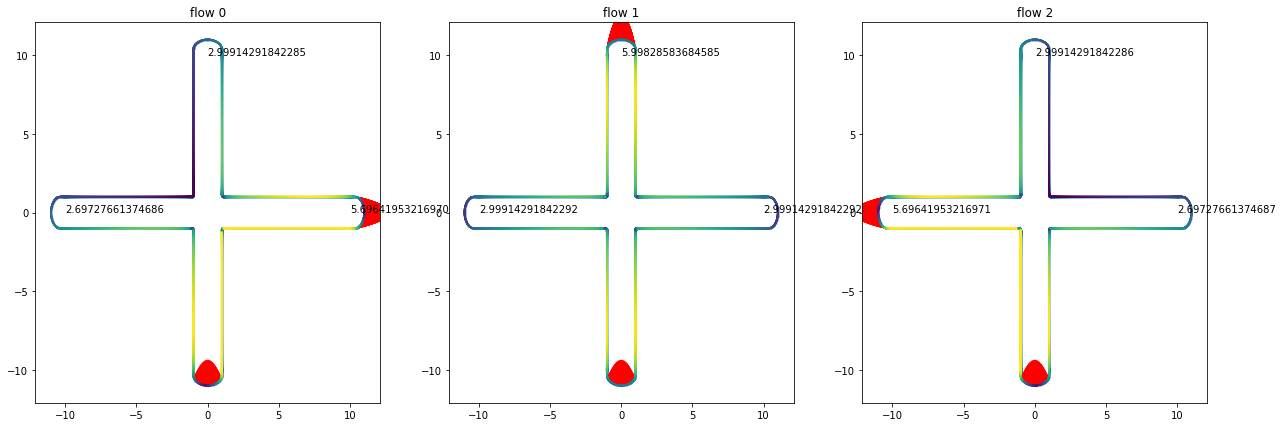

In [30]:
fig, axes = plt.subplots(1,3, figsize=(21,7))
for i in range(3):
    axes[i].scatter(cross.x,cross.y,s=0.1)
    axes[i].quiver(cross.x,cross.y,flows_boundary_conditions[i][:,0],flows_boundary_conditions[i][:,1],scale=10,color='r')
    axes[i].title.set_text('flow '+str(i))
    
    for j in range(3):
        out = flows[j][1]
        end_point = cross.curves[out].p
        axes[i].text(end_point[0],end_point[1], f'{pressure_drops[i][j]:.14f}')
        
    axes[i].scatter(cross.x,cross.y,s=1,c=np.abs(omegas[i]),vmin=0,vmax=10)


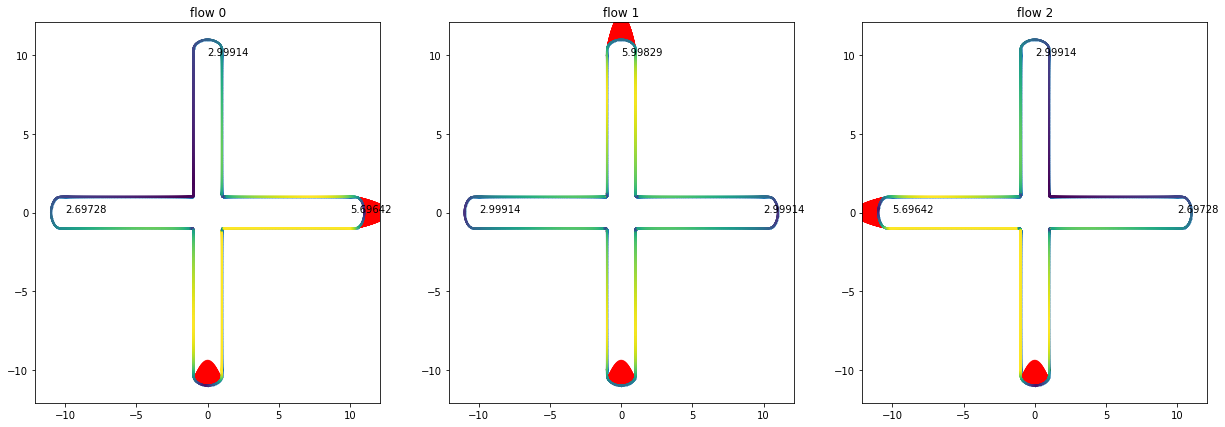

In [31]:
fig, axes = plt.subplots(1,3, figsize=(21,7))
for i in range(3):
    axes[i].scatter(cross.x,cross.y,s=0.1)
    axes[i].quiver(cross.x,cross.y,flows_boundary_conditions[i][:,0],flows_boundary_conditions[i][:,1],scale=10,color='r')
    axes[i].title.set_text('flow '+str(i))
    
    for j in range(3):
        out = flows[j][1]
        end_point = cross.curves[out].p
        axes[i].text(end_point[0],end_point[1], f'{pressure_drops[i][j]:.5f}')
        
    axes[i].scatter(cross.x,cross.y,s=1,c=np.abs(omegas[i]),vmin=0,vmax=10)


this is pretty good. 